In [1]:
import os
import pandas as pd
from scipy.misc import imread
import numpy as np
import cv2
from skimage.feature import hog
import matplotlib.pyplot as plt
%matplotlib inline
'''
def get_df(directory, label):
    imgs = list()
    for filename in os.listdir(directory):
        if filename.endswith(".jpg"):
            img = cv2.imread(directory + filename, 0)
            autocontrast(img, white_perc=0., black_perc = 0.)
            img = hog(img, orientations=6, pixels_per_cell=(2, 2), cells_per_block=(1, 1), visualise=False)
            #img = hog(img, orientations=6, pixels_per_cell=(2, 2), cells_per_block=(2, 2), visualise=False)
            #img = np.reshape(img, (img.shape[0]*img.shape[1])).tolist()
            imgs.append(img) 
        else:
            continue
    return np.array(imgs, dtype=np.float64), np.full((1, len(imgs)), label)
'''
def get_df_faces(directory0, directory1, preprocessing = False):
    imgs0 = list()
    for filename in os.listdir(directory0):
        if filename.endswith(".jpg"):
            img = cv2.imread(directory0 + filename, 0)
            if preprocessing:
                autocontrast(img, white_perc=0., black_perc = 0.)
                #img = hog(img, orientations=6, pixels_per_cell=(2, 2), cells_per_block=(1, 1), visualise=False)
                img = hog(img, orientations=6, pixels_per_cell=(2, 2), cells_per_block=(2, 2), visualise=False)
            else:
                img = np.reshape(img, (img.shape[0]*img.shape[1])).tolist()
            imgs0.append(img) 
        else:
            continue
    imgs1 = list()
    for filename in os.listdir(directory1):
        if filename.endswith(".jpg"):
            img = cv2.imread(directory1 + filename, 0)
            if preprocessing:
                autocontrast(img, white_perc=0., black_perc = 0.)
                #img = hog(img, orientations=6, pixels_per_cell=(2, 2), cells_per_block=(1, 1), visualise=False)
                img = hog(img, orientations=6, pixels_per_cell=(2, 2), cells_per_block=(2, 2), visualise=False)
            else:
                img = np.reshape(img, (img.shape[0]*img.shape[1])).tolist()
            imgs1.append(img) 
        else:
            continue
    Y_closed = np.full((1, len(imgs0)), 0)
    Y_opened = np.full((1, len(imgs1)), 1)
    return np.array(imgs0 + imgs1, dtype=np.float32), np.hstack((Y_closed, Y_opened))

In [2]:
from operator import itemgetter
def autocontrast(image, white_perc=0.2, black_perc = 0.2):
    img = image
    sorted_img = sorted(np.ndenumerate(img), key=itemgetter(1))
    pixels_number = len(sorted_img)
    black_border = float(black_perc)*pixels_number
    white_border = float(white_perc)*pixels_number
    for e in enumerate(sorted_img):
        if (int(round(black_border)) <= e[0] and 
           (e[0] == 0 or e[0] == pixels_number - 1 or img[e[1][0]] != sorted_img[e[0] + 1][1])):
            black_threshold_number = e[0]
            break
        else:
            img[e[1][0]] = 0

    reversed_sorted_img = list(reversed(sorted_img))
    for e in enumerate(reversed_sorted_img):
        if (int(round(white_border)) <= e[0] and 
           (e[0] == 0 or e[0] == pixels_number - 1 or img[e[1][0]] != reversed_sorted_img[e[0] + 1][1])):
            white_threshold_number = pixels_number - e[0] - 1
            break
        else:
            img[e[1][0]] = 255

    black_threshold = sorted_img[black_threshold_number][1]
    white_threshold = sorted_img[white_threshold_number][1]

    for e in enumerate(sorted_img[black_threshold_number : white_threshold_number + 1]):
        img[e[1][0]] = (img[e[1][0]] - black_threshold)*255 / float(white_threshold - black_threshold)

    return img


In [16]:
#eyes only dataset
'''
X_closedl, Y_closedl = get_df("dataset_B_Eye_Images/closedLeftEyes/", 1)
X_closedr, Y_closedr = get_df("dataset_B_Eye_Images/closedRightEyes/", 1)
X_openl, Y_openl = get_df("dataset_B_Eye_Images/openLeftEyes/", 0)
X_openr, Y_openr = get_df("dataset_B_Eye_Images/openRightEyes/", 0)
X = np.vstack((X_closedl, X_closedr, X_openl, X_openr))
Y = np.hstack((Y_closedl, Y_closedr, Y_openl, Y_openr))
'''

'\nX_closedl, Y_closedl = get_df("dataset_B_Eye_Images/closedLeftEyes/", 1)\nX_closedr, Y_closedr = get_df("dataset_B_Eye_Images/closedRightEyes/", 1)\nX_openl, Y_openl = get_df("dataset_B_Eye_Images/openLeftEyes/", 0)\nX_openr, Y_openr = get_df("dataset_B_Eye_Images/openRightEyes/", 0)\nX = np.vstack((X_closedl, X_closedr, X_openl, X_openr))\nY = np.hstack((Y_closedl, Y_closedr, Y_openl, Y_openr))\n'

In [ ]:
#X_opened, Y_opened = get_df("dataset_B_FacialImages/OpenFace/", 1)
#X_closed, Y_closed = get_df("dataset_B_FacialImages/ClosedFace/", 0)
#X = np.vstack((X_closed, X_opened))
#Y = np.hstack((Y_closed, Y_opened))
X, Y = get_df_faces("dataset_B_FacialImages/ClosedFace/", "dataset_B_FacialImages/OpenFace/", True)

# Dimension reduction without preprocessing

In [ ]:
from sklearn.manifold import LocallyLinearEmbedding as LLE
n_components = 2

Neighbors = range(2,15)
results_LLE = []
for n_neighbors in Neighbors:
    print(n_neighbors, "processing...")
    lle = LLE(n_neighbors, n_components).fit_transform(X)
    results_LLE.append(lle)

(2, 'processing...')
(3, 'processing...')
(4, 'processing...')
(5, 'processing...')
(6, 'processing...')
(7, 'processing...')
(8, 'processing...')
(9, 'processing...')
(10, 'processing...')
(11, 'processing...')


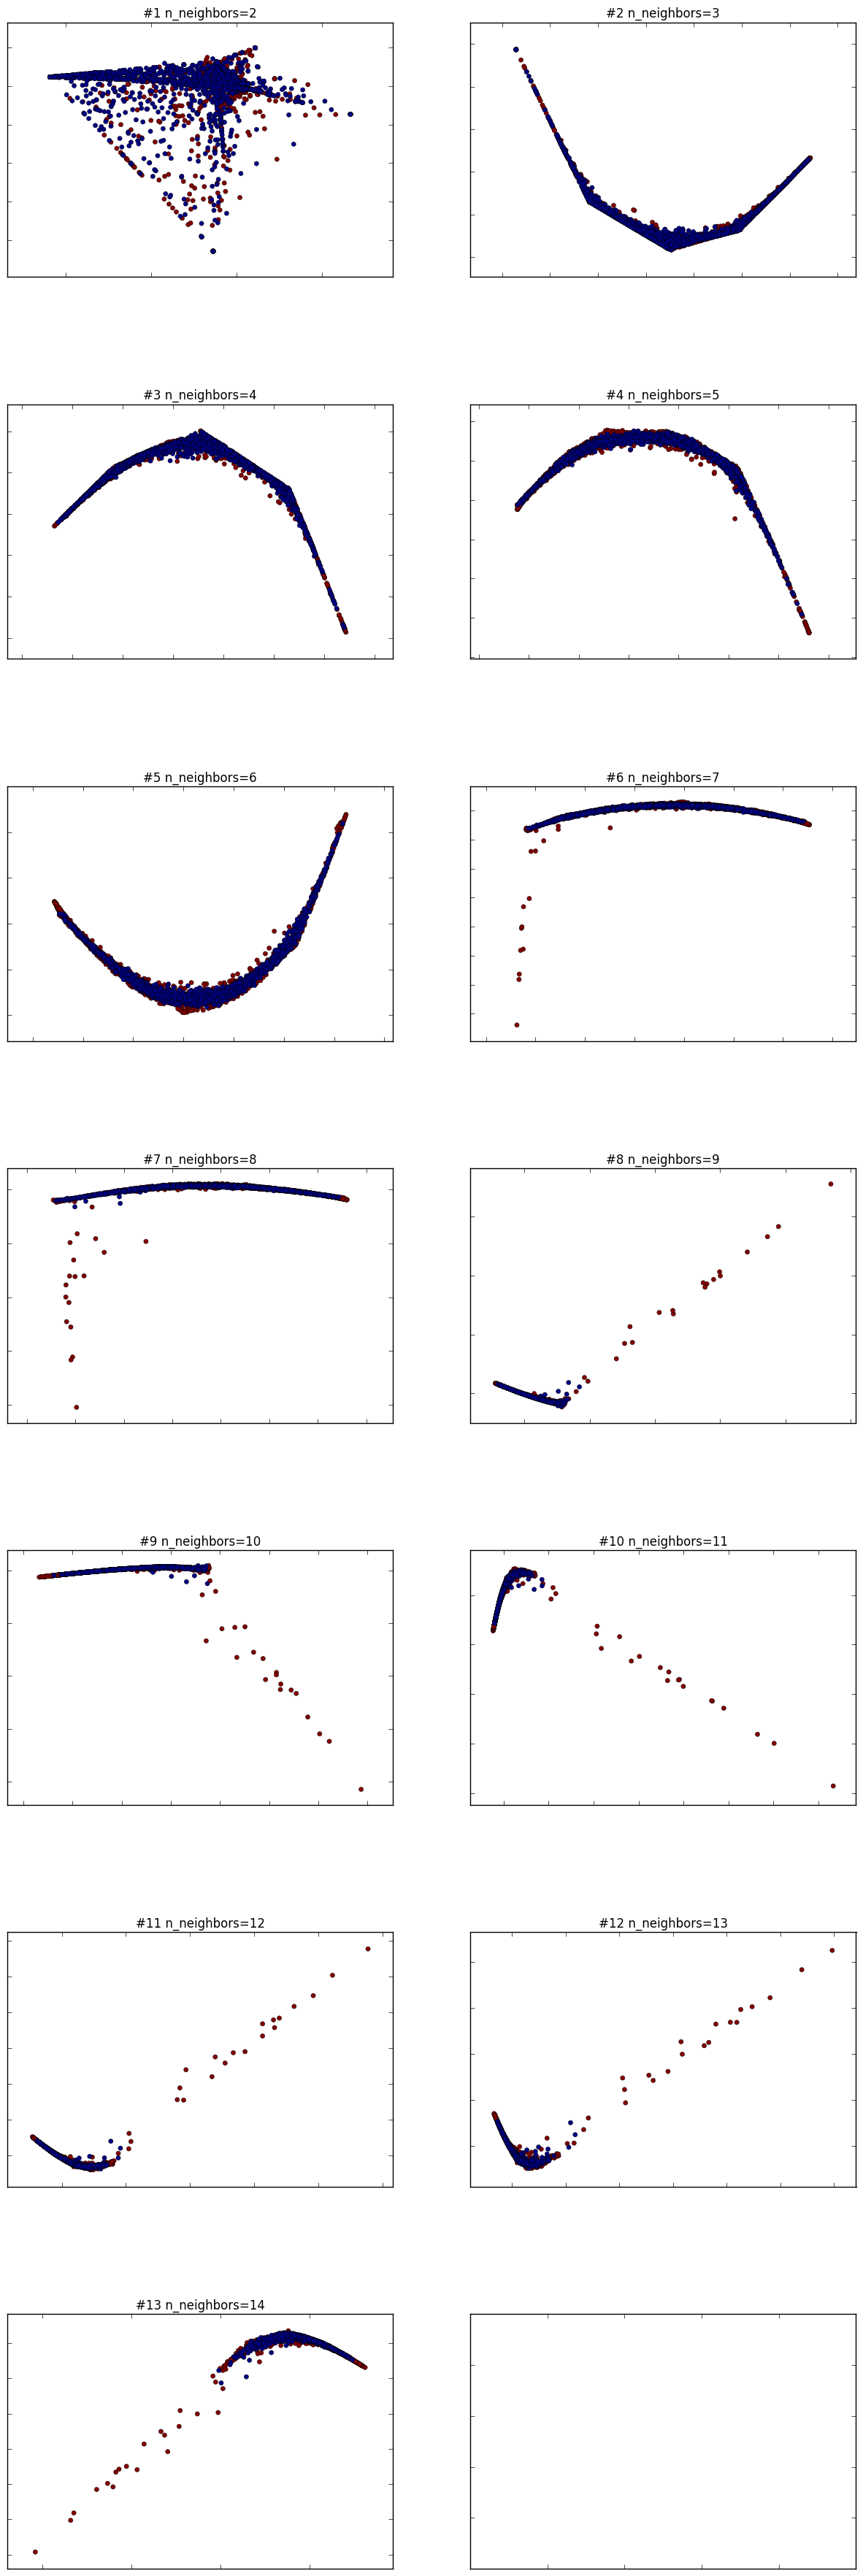

In [50]:
from matplotlib.ticker import NullFormatter
from matplotlib import colors as clrs
import matplotlib.pyplot as plt

color = clrs.Normalize()
color.autoscale(Y)
c = color(Y)

fig, axarr = plt.subplots(7, 2, figsize=(15, 45))

for i, Y in enumerate(results_LLE):
    
    ax = axarr[i//2, i%2]
    
    ax.scatter(Y[:, 0], Y[:, 1], c=c, lw = 0.3)# cmap=plt.cm.Spectral)
    ax.set_title("#{} n_neighbors={}".format(i+1, Neighbors[i]))
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis('tight')


plt.setp([a.get_xticklabels() for a in axarr.flatten()], visible=False)
plt.setp([a.get_yticklabels() for a in axarr.flatten()], visible=False)

fig.subplots_adjust(hspace=.5)

plt.show()

In [41]:
from sklearn.manifold import TSNE
n_components = 2

Perplexity = range(9, 51, 3)
results_TSNE = []
for perplexity in Perplexity:

    X_ = TSNE(n_components=2, perplexity=perplexity).fit_transform(X)
    
    results_TSNE.append(X_)


In [42]:
Y = np.hstack((Y_closedl, Y_closedr, Y_openl, Y_openr))

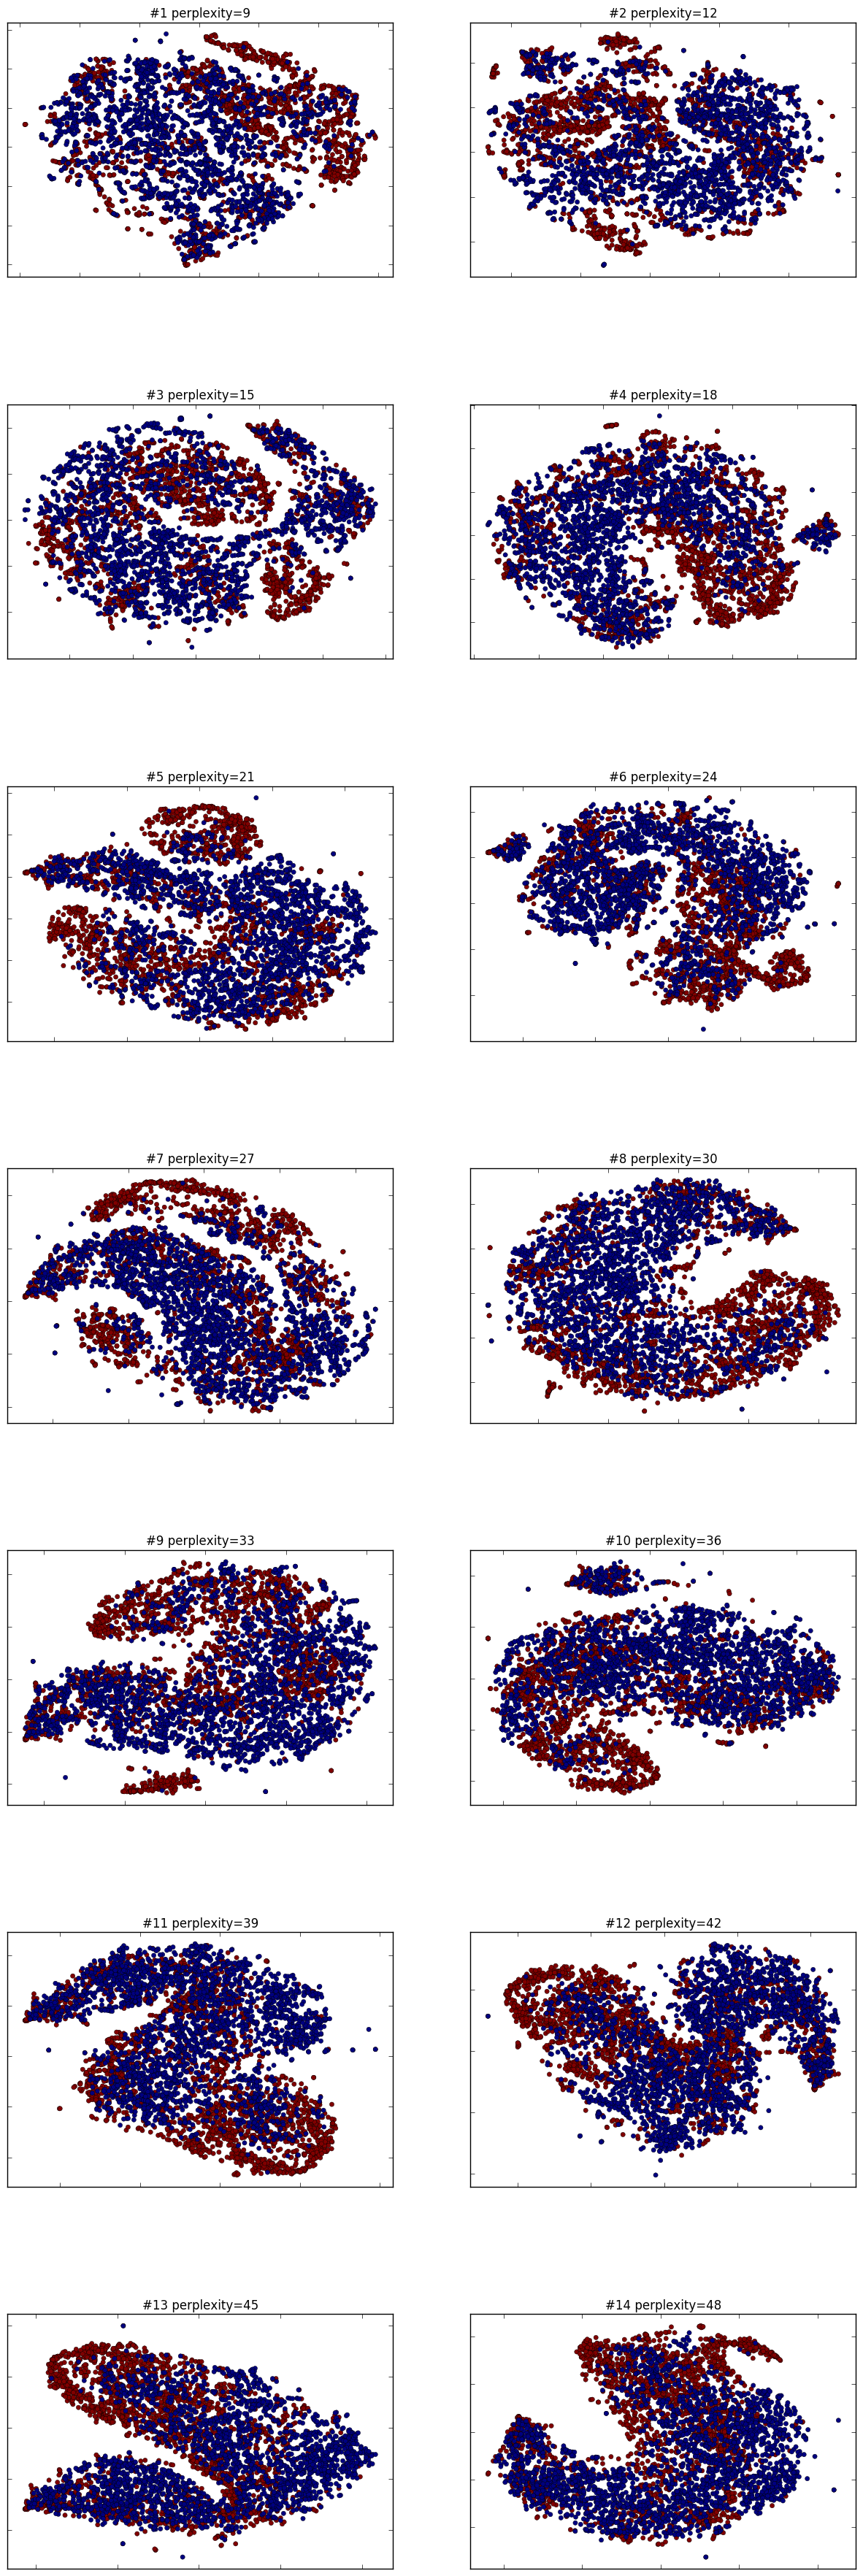

In [43]:
from matplotlib.ticker import NullFormatter
from matplotlib import colors as clrs
import matplotlib.pyplot as plt

color = clrs.Normalize()
color.autoscale(Y)
c = color(Y)

fig, axarr = plt.subplots(7, 2, figsize=(15, 45))

for i, Y in enumerate(results_TSNE):
    
    ax = axarr[i//2, i%2]
    
    ax.scatter(Y[:, 0], Y[:, 1], c=c, lw = 0.3)# cmap=plt.cm.Spectral)
    ax.set_title("#{} perplexity={}".format(i+1, Perplexity[i]))
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis('tight')


plt.setp([a.get_xticklabels() for a in axarr.flatten()], visible=False)
plt.setp([a.get_yticklabels() for a in axarr.flatten()], visible=False)

fig.subplots_adjust(hspace=.5)

plt.show()

# Dimension reduction with autocontrast w =0.2, b = 0.2 and hog

In [11]:
from sklearn.manifold import LocallyLinearEmbedding as LLE
n_components = 2

Neighbors = range(2,5)
results_LLE = []
for n_neighbors in Neighbors:

    Y = LLE(n_neighbors, n_components).fit_transform(X)
    
    results_LLE.append(Y)

In [17]:
Y = np.hstack((Y_closedl, Y_closedr, Y_openl, Y_openr))

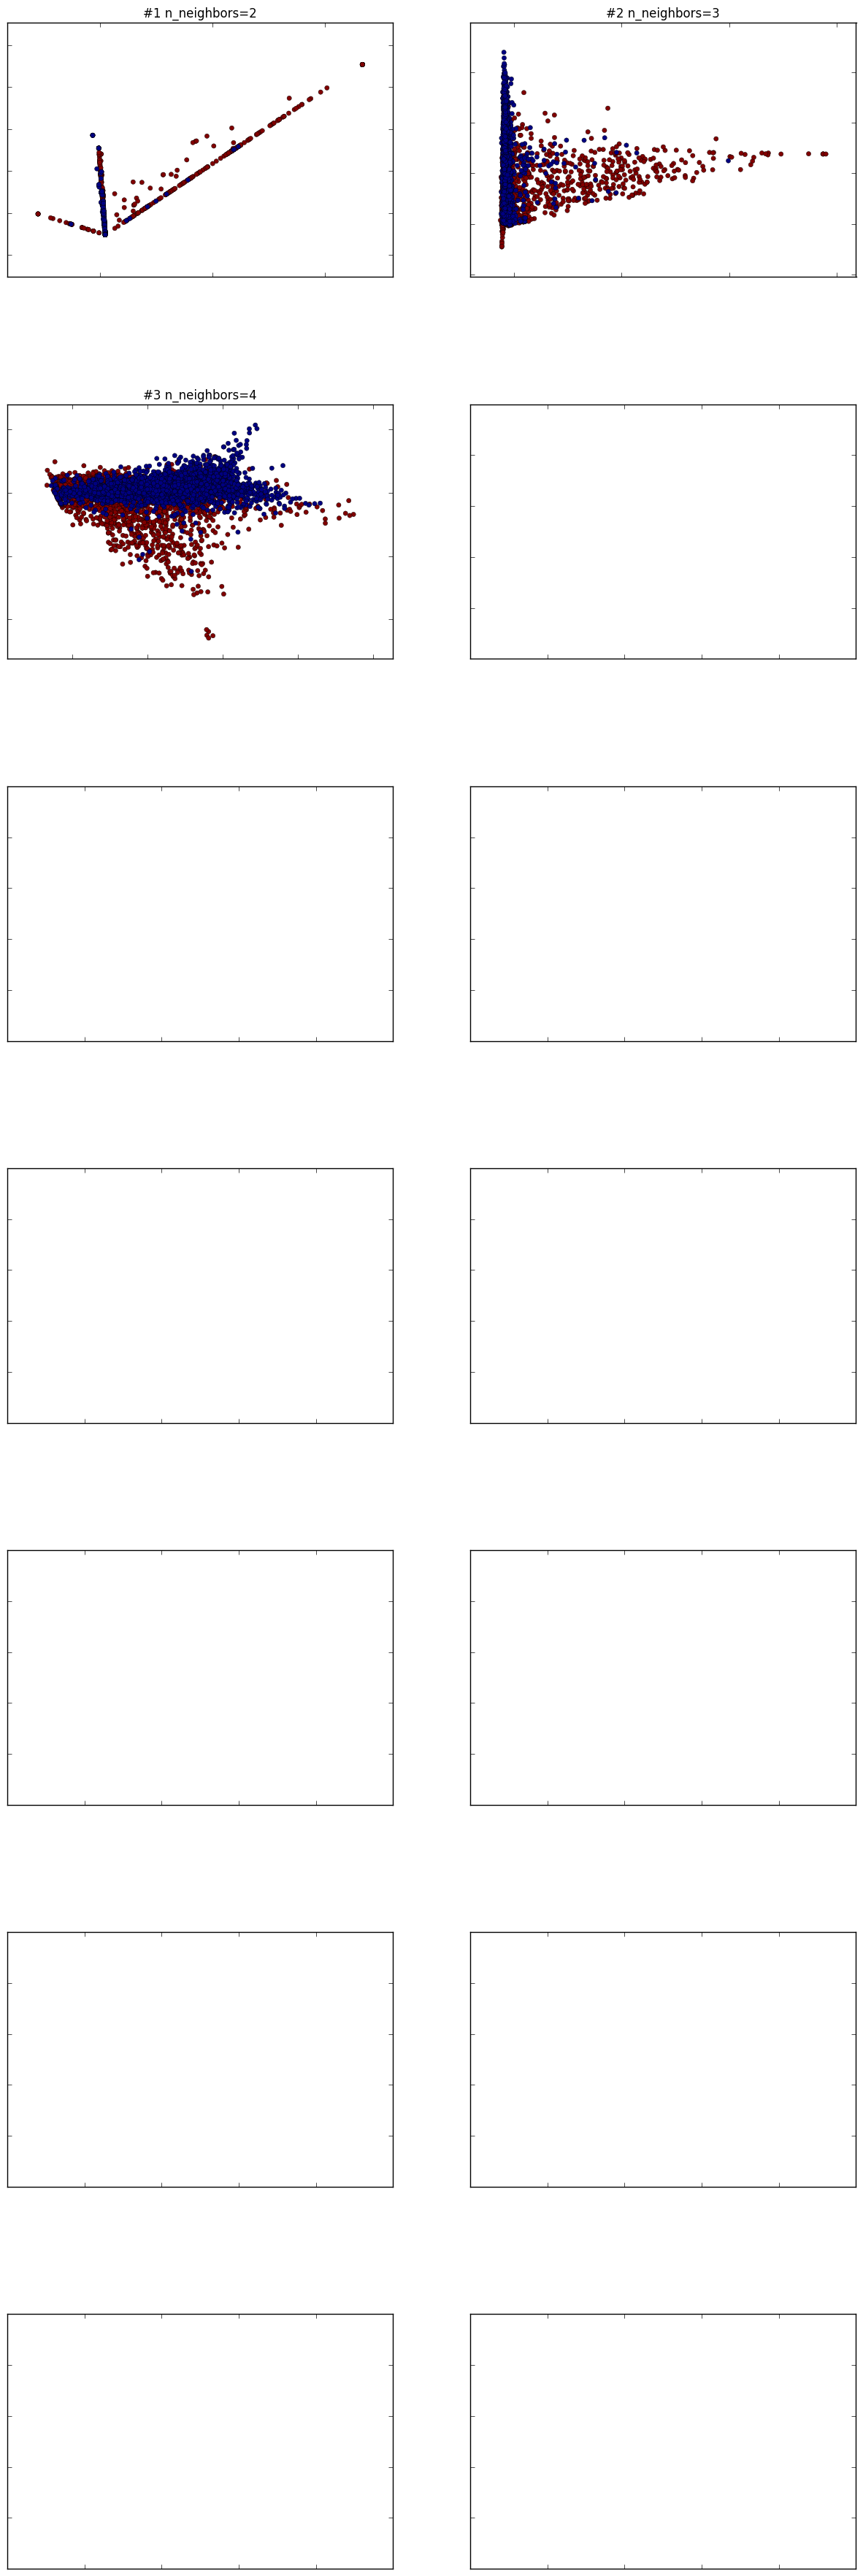

In [13]:
from matplotlib.ticker import NullFormatter
from matplotlib import colors as clrs
import matplotlib.pyplot as plt

color = clrs.Normalize()
color.autoscale(Y)
c = color(Y)

fig, axarr = plt.subplots(7, 2, figsize=(15, 45))

for i, Y in enumerate(results_LLE):
    
    ax = axarr[i//2, i%2]
    
    ax.scatter(Y[:, 0], Y[:, 1], c=c, lw = 0.3)# cmap=plt.cm.Spectral)
    ax.set_title("#{} n_neighbors={}".format(i+1, Neighbors[i]))
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis('tight')


plt.setp([a.get_xticklabels() for a in axarr.flatten()], visible=False)
plt.setp([a.get_yticklabels() for a in axarr.flatten()], visible=False)

fig.subplots_adjust(hspace=.5)

plt.show()

# Eyes-only dataset score

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
#hog only
clf = LogisticRegression()
clf.fit(X,*Y)
scores = cross_val_score(clf, X, *Y, cv=10, scoring="accuracy")
print(scores.mean(), scores.std())

0.929832046032 0.00964285522013


In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
#0. 0. hog
clf = LogisticRegression()
clf.fit(X,*Y)
scores = cross_val_score(clf, X, *Y, cv=10, scoring="accuracy")
print(scores.mean(), scores.std())

0.932104773305 0.00846508235351


In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
#0.1 0.1 hog
clf = LogisticRegression()
clf.fit(X,*Y)
scores = cross_val_score(clf, X, *Y, cv=10, scoring="accuracy")
print(scores.mean(), scores.std())

0.922404663806 0.0130628155176


In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
#0.2 0.2 hog
clf = LogisticRegression()
clf.fit(X,*Y)
scores = cross_val_score(clf, X, *Y, cv=10, scoring="accuracy")
print(scores.mean(), scores.std())

0.915386248195 0.0163269578163


In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
#0.3 0.3 hog
clf = LogisticRegression()
clf.fit(X,*Y)
scores = cross_val_score(clf, X, *Y, cv=10, scoring="accuracy")
print(scores.mean(), scores.std())

0.887951580086 0.0159835058581


# Faces dataset score

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
#0. 0. hog
clf = LogisticRegression()
clf.fit(X,*Y)
scores = cross_val_score(clf, X, *Y, cv=10, scoring="roc_auc")
print("roc_auc: ",scores.mean(), scores.std())
scores = cross_val_score(clf, X, *Y, cv=10, scoring="accuracy")
print("accuracy: ",scores.mean(), scores.std())

roc_auc:  0.932439395834 0.0122502546632
accuracy:  0.859258785348 0.0252649413628


In [12]:
from sklearn.svm import SVC
clf = SVC(kernel="rbf", gamma=0.1, C=5)
scores = cross_val_score(clf, X, *Y, cv=10, scoring="accuracy", verbose=2)
print("accuracy: ",scores.mean(), scores.std())

[CV]  ................................................................
[CV] ................................................. , total= 1.7min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.7min remaining:    0.0s


[CV] ................................................. , total= 1.7min
[CV]  ................................................................
[CV] ................................................. , total= 1.6min
[CV]  ................................................................
[CV] ................................................. , total= 1.7min
[CV]  ................................................................
[CV] ................................................. , total= 1.6min
[CV]  ................................................................
[CV] ................................................. , total= 1.6min
[CV]  ................................................................
[CV] ................................................. , total= 1.7min
[CV]  ................................................................
[CV] ................................................. , total= 1.6min
[CV]  ................................................................
[CV] .

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed: 16.2min finished


In [11]:
SVC?

# Eye detection

In [44]:

face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
eyes_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')

In [ ]:
img = X[500].astype(np.uint8)
gray = img#cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
eyes = eyes_cascade.detectMultiScale(gray, 1.3, 5)

for (x,y,w,h) in eyes:
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)

plt.imshow(img)

In [46]:
cv2.imshow?

# Wavelet transform(reduction)

In [8]:
import pywt

In [35]:
coeffs = pywt.dwt2(X[2555], 'haar')

In [36]:
coeffs[0][:4,:4].shape

(12, 12)

In [37]:
coeffs[1][0][:4,:4].shape

(12, 12)

In [38]:
coeffs[1][1][:4,:4].shape

(12, 12)

In [39]:
coeffs[1][2][:4,:4].shape

(12, 12)

TypeError: Invalid dimensions for image data

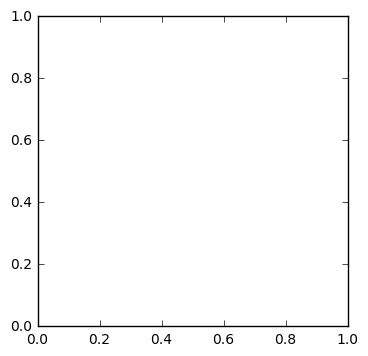

In [163]:
#plt.imshow(autocontrast(X[1352]), cmap="gray")
plt.imshow(X[2555], cmap="gray")

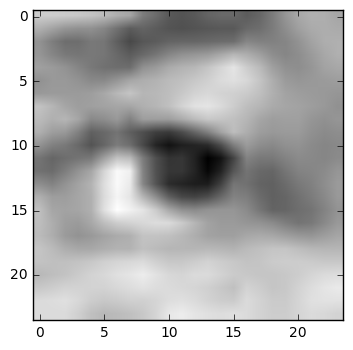

In [55]:
n = 12
shrinked_coeff = (coeffs[0][:n,:n],(coeffs[1][0][:n,:n], coeffs[1][1][:n,:n], coeffs[1][2][:n,:n]))
plt.imshow(pywt.idwt2(shrinked_coeff , 'haar'), cmap="gray")

In [ ]:
cv2.